In [46]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")

In [47]:
hidden_nodes = 225
epochs = 1
lr = 1e-4
samples = 60000
input_size = 196
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.1
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(1,hidden_nodes))
W2 = np.random.normal(0,1,(hidden_nodes,input_size))
Bi2 = np.random.normal(0,1,(1,input_size))

In [48]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = np.zeros(W1.shape)
    b1 = np.zeros(Bi1.shape)
    w2 = np.zeros(W2.shape)
    b2 = np.zeros(Bi2.shape)
    S  = np.zeros(W1.shape)
    #forward pass
    out1 = layer(X,W1,Bi1)
    z = sigm(out1)
    out2 = layer(z,W2,Bi2)
    y = sigm(out2)
    #BACKPROPAGATION
    del1 = 2*(y-X)*diff_sigm(out2)
    b2 = np.sum(del1, axis = 0).reshape(np.shape(Bi2))
    w2 = np.matmul(z.T,del1)
    zm = np.mean(z,axis = 0)
#     print(z.shape,zm.shape)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out1)
#     print(ge.shape)
    s1 = ge-np.multiply(diff_sigm(out1),np.sum(del1, axis=1).reshape(samples,1))
    b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    w1 = np.matmul(X.T,s1)
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
    W2 -= lr*w2
    Bi1 -= lr*b1
    Bi2 -= lr*b2

(0, 4813170.083062036)
(1, 2395348.841108337)
(2, 2734987.830301474)
(3, 1433664.1501533457)
(4, 1235326.0200254824)
(5, 1236980.3457530655)
(6, 1161387.9618902588)
(7, 1118430.9727626755)
(8, 1035345.7364268553)
(9, 1019369.2282899376)
(10, 953372.9604842532)
(11, 967989.3979141373)
(12, 900396.6880502983)
(13, 928740.0675324588)
(14, 853193.4764544527)
(15, 892929.8628927945)
(16, 811622.8193832708)
(17, 855429.4929592483)
(18, 775244.6160700915)
(19, 814691.6463272707)
(20, 743403.5209758703)
(21, 774737.9762914277)
(22, 715894.7288734037)
(23, 739926.7461971989)
(24, 692033.261153235)
(25, 710091.4182666203)
(26, 671277.5592361818)
(27, 683801.1100049716)
(28, 652725.6025909471)
(29, 660601.2260592821)
(30, 635800.0203382691)
(31, 639995.5567963247)
(32, 620173.7499562227)
(33, 621545.9890341787)
(34, 605615.4751704369)
(35, 604895.6599787865)
(36, 591946.5667241755)
(37, 589748.6695482905)
(38, 579047.8951900165)
(39, 575874.5699105135)
(40, 566852.0537952762)
(41, 563076.94406853

In [49]:
out1 = layer(X,W1,Bi1)
z = sigm(out1)
out2 = layer(z,W2,Bi2)
y = sigm(out2)
y = y*255.0

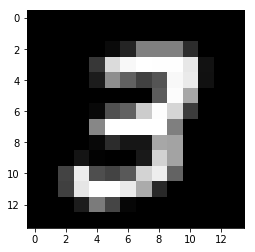

In [50]:
plt.imshow(X[7].reshape(14,14) , cmap='gray')

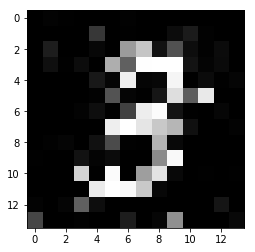

In [51]:
plt.imshow(y[7].reshape(14,14) , cmap='gray' )

In [58]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))

print(np.mean(z[1]))


(54, 225)
0.06825834755595714
